<a href="https://colab.research.google.com/github/jasonrodneybrooks/Student-Stats/blob/main/Harkness_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### End-to-End with Assembly.ai ###

### Input to Email ###

In [7]:
# !pip install wordcloud
# !pip install pywaffle
!pip install chord

# Converting .mp4 to transcript

In [8]:
#Data Manipulation
import pandas as pd
import datetime as dt
import numpy as np

# get_transcript()
#Visualization
import matplotlib.pyplot as plt
from chord import Chord
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

#Text manipulation
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
from gensim.parsing.preprocessing import remove_stopwords
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import sys
import time
import requests

filename = "/content/drive/MyDrive/Harkness/Harkness_Folder/Harkness/assets/FullSailUniversity.mp4"
 
def read_file(filename, chunk_size=5242880):
    with open(filename, 'rb') as _file:
        while True:
            data = _file.read(chunk_size)
            if not data:
                break
            yield data

headers = {'authorization': "bb2cbd5a7d1c4729a643b6971f0a5ea5"}
response = requests.post('https://api.assemblyai.com/v2/upload',
                         headers=headers,
                         data=read_file(filename))

#this is needed for the next call below - 'audio url'
url = response.json()['upload_url']

#print(response.json())

In [11]:
#STEP 2
#THIS CAN ALSO TAKE ONLINE HOSTED FILE WHERE URL CALL IS LOCATED

import requests
endpoint = "https://api.assemblyai.com/v2/transcript"

json = {
  "audio_url": f"{url}", 
  'auto_highlights': True,
  'speaker_labels': True
}

headers = {
    "authorization": "bb2cbd5a7d1c4729a643b6971f0a5ea5",
    "content-type": "application/json"
}

response = requests.post(endpoint, json=json, headers=headers)
id = response.json()['id']
# response.json()

In [12]:
response.json()['status']

'queued'

In [13]:
#STEP 3 - TO GET THE TRANSCRIPT
# import requests

endpoint = f"https://api.assemblyai.com/v2/transcript/{id}"

headers = {
    "authorization": "bb2cbd5a7d1c4729a643b6971f0a5ea5",

}

response = requests.get(endpoint, headers=headers)
status = response.json()['status']
while status == 'queued' or status == 'processing':
    response = requests.get(endpoint, headers=headers)
    status = response.json()['status']

transcript_json = response.json()

In [14]:
#Prints out the who json file
transcript_json

{'acoustic_model': 'assemblyai_default',
 'audio_duration': 465,
 'audio_end_at': None,
 'audio_start_from': None,
 'audio_url': 'https://cdn.assemblyai.com/upload/5bfe0fa0-f2e3-4019-a1f9-0760cba46975',
 'auto_highlights': True,
 'auto_highlights_result': {'results': [{'count': 5,
    'rank': 0.07,
    'text': 'things',
    'timestamps': [{'end': 94110, 'start': 93760},
     {'end': 106670, 'start': 106410},
     {'end': 409150, 'start': 408860},
     {'end': 411250, 'start': 410990},
     {'end': 416050, 'start': 415850}]},
   {'count': 6,
    'rank': 0.06,
    'text': 'people',
    'timestamps': [{'end': 132740, 'start': 132480},
     {'end': 157850, 'start': 157590},
     {'end': 169950, 'start': 169690},
     {'end': 237590, 'start': 237320},
     {'end': 272660, 'start': 272430},
     {'end': 398650, 'start': 398420}]},
   {'count': 1,
    'rank': 0.05,
    'text': 'robotic cameras',
    'timestamps': [{'end': 261650, 'start': 260480}]},
   {'count': 3,
    'rank': 0.05,
    'text

# Creating a dataframe

In [15]:
# #Uncomment if using the assemebly.ai API
df = pd.DataFrame.from_dict(transcript_json['utterances'])
df['num_words_spoken'] = df['text'].str.len()

df.head()

,confidence,end,text,start,speaker,words,num_words_spoken
0,0.943030,37350,You guys are all really successful in your ind...,25160,A,"[{'text': 'You', 'confidence': 1.0, 'speaker':...",193
1,0.940762,90650,Repetition. Hands down. No hands down. Repetit...,37380,B,"[{'text': 'Repetition.', 'confidence': 0.96, '...",1059
2,0.926800,99510,So saying no sometimes to things that were not...,90660,A,"[{'text': 'So', 'confidence': 0.98, 'speaker':...",128
3,0.950450,124640,"Yeah. I mean, in general, I'm a pretty workabl...",99740,B,"[{'text': 'Yeah.', 'confidence': 0.95, 'speake...",576
4,0.927053,150350,"Well, I think, you know, I mean, that sort of ...",124650,C,"[{'text': 'Well,', 'confidence': 0.88, 'speake...",511


In [16]:
#Speaker per words
speaker_words = []
for i in df.groupby('speaker'):
  speaker_words.append(i)


In [17]:
speak_A = df.loc[(df['speaker'] == 'A')]

speak_a_words = []
for i in speak_A['text']:
  speak_a_words.append(i)

In [18]:
speak_a_words

["You guys are all really successful in your industry, but in your opinion, like, Let's start with the success question. What do you feel like? Is the biggest contributing factor to your success?",
 'So saying no sometimes to things that were not that took you away from the past, that you felt like you were focused on walking.',
 "Yeah. I think a big part of success is really realizing that a realistic path isn't always the most glamorous, but also being open to opportunities that you might not have thought of and really honing your intuition to recognize those opportunities when they come along, because something really good might pass you by. Keeping an open mind is maybe what I'm hearing from you."]

In [19]:
def classify_df(classification_df):

    for i in range(1, len(classification_df)):
        sentence_list = diar_df.loc[i, 'text']
        list = nltk.tokenize.sent_tokenize(sentence_list)
        preds = sentence_predictions(list)
        classification_df.loc[i, 'Questions'] = preds.count(1)
        classification_df.loc[i, 'Statements'] = preds.count(2)
        classification_df.loc[i, 'Commands'] = preds.count(3)

    return classification_df

In [20]:
#Dataframe for Questions/Statement/Command visualization in Plotly
# data = pd.read_csv('/content/drive/MyDrive/StudentStats/Harkness_Folder/Harkness/Hark_QSC_Mock.csv')

In [21]:
words = df[['speaker', 'num_words_spoken']]
words = words.groupby('speaker').sum('num_words_spoken')

In [22]:
#SAVE YOUR WORK!!!
# df.to_csv('end2end.csv')

# Read in 'chord.csv'
# df = pd.read_csv('end2end.csv')

# Times Each Person Spoke

In [23]:
# How many times did each person speak?
times_each_spoke = pd.crosstab(df['speaker'], columns = 'speaker')
times_each_spoke = times_each_spoke['speaker'].sort_values(ascending = False)
names = times_each_spoke.index.sort_values(ascending=False)

In [24]:
#Creating the conversation summary
# nlp = spacy.load("en_core_web_sm")
nlp = en_core_web_sm.load()

# Create master transcript from df['Text']
keywords = []
for i in df['text']:
    keywords.append(i)
        
#Convert list to string
keywords = ' '.join([str(item) for item in keywords])

#The sentence that best summarizes the article
summary = summarize(keywords, ratio  = .1)
summary = summary.split('.')[0]
summary

"You guys are all really successful in your industry, but in your opinion, like, Let's start with the success question"

In [27]:
range(0,60)

range(0, 60)

In [28]:
df['text']

0     You guys are all really successful in your ind...
1     Repetition. Hands down. No hands down. Repetit...
2     So saying no sometimes to things that were not...
3     Yeah. I mean, in general, I'm a pretty workabl...
4     Well, I think, you know, I mean, that sort of ...
5                                                Right.
6     I've always liked doing this. And I want to fi...
7                                                 That.
8     And it just isn't that the passion isn't a spe...
9     And the key thing is, all of us will probably ...
10    I tell people, try to find a niche to exploit....
11                                                Yeah.
12    I think a lot of kids, they think sort of line...
13    Yeah. I think a big part of success is really ...
14    No, definitely. And then sometimes you have to...
15    A lot of times you don't even control that rig...
Name: text, dtype: object

In [29]:
words = []
for i in df['text']:
    words.append(i)

In [30]:
# text = """
# ixty percent of those polled said these safeguards and access to a nurse, daily health screenings, smaller class sizes and continued distance learning for students and teachers with medical conditions are all essential to reopening schools. The poll found that 85% of California voters surveyed expect school districts to make “major changes” to prevent the spread of the virus.

# The online poll, conducted by Hart Research Associates between Sept. 18 and Sept. 25, asked 1,295 registered voters, including 527 parents, to answer questions about how and when California schools should reopen. Researchers polled a sample of California voters who matched the demographics of California voters overall, said Geoff Garin, president of Hart Research Associates.

# Researchers found that 62% of voters would not be comfortable sending their children to school at this time.
# """

In [51]:
speak_A = df.loc[(df['speaker'] == 'A')]

speak_a_words = []
for i in speak_A['text']:
  speak_a_words.append(i)

In [52]:
# text = ' '.join(map(str, words))
text = ' '.join(map(str, speak_a_words))

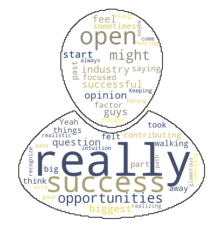

In [53]:
mask = np.array(Image.open('/content/drive/MyDrive/Harkness/Harkness_Folder/Harkness/humanword.png'))
wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], contour_width = 1.5, colormap = 'cividis')
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('man_cloud.png')
plt.show()

In [ ]:
#This is the summary#

In [ ]:

text

In [34]:
Chord.user = "jasonrodneybrooks@gmail.com"
Chord.key = "CP-79642c07-fcad-4b3c-81b3-d3d6bf4be0a6"

#Get chord diagram
links = df.loc[:, ('speaker', 'num_words_spoken')]
links['target'] = links['speaker'].shift(periods=-1)
links['num_words_received'] = links['num_words_spoken'].shift(periods=-1)

names_label = pd.crosstab(links['speaker'], links['target'])
names = names_label.index.to_list()
matrix = names_label.values.tolist()

chord = Chord(matrix, names, arc_numbers = True, 
              conjunction = "&", verb = "spoke to each other ", noun = 'times', 
              colors='d3.schemeSet1',opacity=0.8, symmetric = False,
        padding=0.001,
        width=900,
        label_color="#454545",
        wrap_labels=True,
        margin=0,
        credit=True,
        font_size="20px",
        font_size_large="18px")

chord.show()

In [ ]:
from IPython.display import Audio

In [ ]:
import numpy as np

In [ ]:
signal = filename

In [ ]:
Audio(signal)

In [ ]:
import pandas as pd
df = pd.read_csv('smith.csv')
df = df.sort_index()
df.to_csv('smith.csv')

In [36]:
#OLd code which can help with 
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# # import dash
# # import dash_html_components as html

# # Initialize figure with subplots
# fig = make_subplots(
#     rows=2, cols=2,
#     subplot_titles=("Words per Minute", "Who spoke the most?", "Questions - Statements - Commands", "Rates of Participation?"),
#     column_widths=[0.5, 0.5],
#     row_heights=[0.5, 0.5],
#     specs=[[{"type": "scatter"}, {"type": "bar"}],
#            [{"type": "scatter"}, {"type": "bar"}]])

# # Creating X & Y for words per minute graph
# # Creates plot in upper lefthand (Row 1, Col 1) "Words/per minute"
# x = df.index
# y = df['num_words_spoken']
# fig.add_trace(go.Scatter(x=x, y=y,
#                     mode='lines',
#                     name='Words/minute', 
#                     marker=dict(color="#222a35"))
#                     , row = 1, col =1)

# # Creates plot in lower lefthand (Row 2, Col 1) "Questions/Statement/Commands"
# fig.add_trace(
#     go.Scatter(
#         x=[2, 4, 6], y=[1, 1, 1],
#         text = ['Questions', 'Statements', 'Commands'],
#         textposition="middle center",
#         mode='markers',
#         marker=dict(
#             color=['#6CABDD', '#1C2C5B',
#                    '#ff0000'],
#                     opacity=[.8, 0.8, 0.8],
#                     size=[data['Questions'].sum()*4, data['Statements'].sum()*4, data['Commands'].sum()*4],
#                     )
# ),row=2, col=1)

# # Add locations bar chart row 1, col 2
# fig.add_trace(go.Bar(
#           x = words.index,
#           y= words['num_words_spoken'], 
#            marker=dict(color="#6CABDD"), 
#            text = words['num_words_spoken'],
#            textposition='inside',
#            showlegend=False),
#            row=1, col=2
# )

# # Add locations bar chart row 2, col 3
# fig.add_trace(  
#     go.Bar(x = times_each_spoke, y = names, orientation = 'h',marker=dict(color="#222a35"), showlegend=False),
#     row=2, col=2
# )

# # Rotate x-axis labels
# fig.update_xaxes(tickangle=0)

# # Update xaxis properties
# fig.update_xaxes(title_text="Minutes", tickmode = 'linear', row=1, col=1)
# fig.update_xaxes(title_text="Participants", row=1, col=2)
# fig.update_xaxes(title_text="Types of Sentences", visible = False, showgrid=False, row=2, col=1)
# fig.update_xaxes(title_text="Times Spoken",tickmode = 'linear', row=2, col=2)

# # Update yaxis properties
# fig.update_yaxes(title_text="Words", row=1, col=1)
# fig.update_yaxes(title_text="Words", row=1, col=2)
# fig.update_yaxes(title_text="", visible = False, showgrid=False, row=2, col=1)
# fig.update_yaxes(title_text="Participants", row=2, col=2)


# # Set theme, margin, and annotation in layout
# colorway = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# fig.update_layout(  
#     template="plotly",
#     font_family = "Garamond",
#     paper_bgcolor = "#FFFFFF",
#     plot_bgcolor = "#FFFFFF",
#     colorway = colorway,
#     margin=dict(r=10, t=60, b=40, l=60),
#     showlegend = False
# )

# fig.show()